In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 简单练习

  输出一个5*5的矩阵
  

In [77]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2 单变量的线形回归

整个2的部分需要根据城市人口数量，预测开小吃店的利润
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

## 2.1 Plotting the Data

读入数据，展示数据

In [78]:
path = 'E:\机器学习(吴恩达)\ML数据\ml_ex1\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


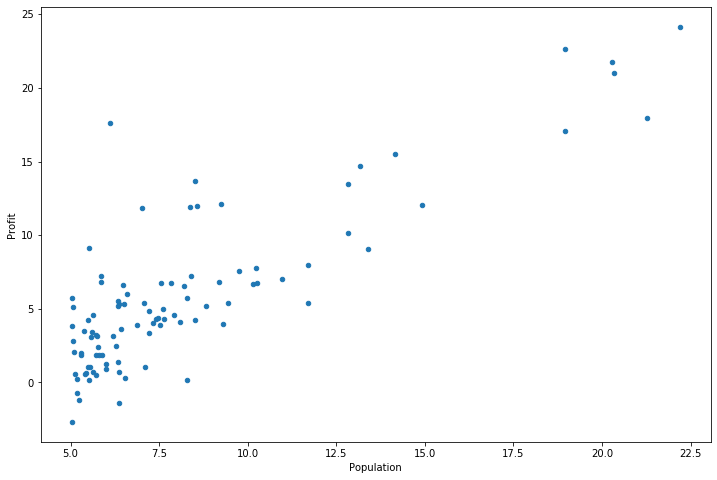

In [79]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

## 2.2 梯度下降
训练线性回归的参数$\theta$

### 2.2.1 约定公式

In [80]:
def computerCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

### 2.2.2 实现
加入一列x，用于更新$\theta_0$,然后将$\theta$初始化为0，学习率初始化为0.01，迭代次数为1500次

In [81]:
data.insert(0, 'Ones', 1)   #在data第1、2列之间插入全是1的一列数
#初始化X和y
cols = data.shape[1]     # 计算data的列数 cols=3
X = data.iloc[:,:-1]     # X是data里的除最后列
y = data.iloc[:,cols-1:cols]    # y是data最后一例

In [82]:
X.head()  #head 是观察前五行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [83]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [84]:
#代价函数应该是numpy矩阵，转换X和y，初始化theta
#首先把变量由data frames 转化为矩阵形式
X = np.matrix(X.values)
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

### 2.2.3 计算J（$\theta$） 
 
 

In [85]:
computerCost(X, y, theta)

32.072733877455676

### 2.2.4 梯度下降

In [86]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    paramenters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(paramenters):
            term = np.multiply(error, X[:,j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computerCost(X, y, theta)
    return theta, cost
# 实现$\theta$的更新

In [88]:
alpha = 0.01
iters = 1500
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [90]:
#预测35000和70000城市规模的小吃摊利润
predict1 = [1, 3.5] * g.T
print("predict1:",predict1)
predict2 = [1, 7] * g.T
print("predict2:",predict2)


predict1: [[0.45197679]]
predict2: [[4.53424501]]
